In [1]:
import pandas as pd
import seaborn as sns
import rho_plus as rp
from baysic.utils import quick_view, json_to_df
IS_DARK = False
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)

No module named 'phonopy'


In [4]:
from pathlib import Path
run_id = Path('logs') / '10-02' / '2'

df = json_to_df(run_id / 'total.json')
df.head()

,sg_symbol,symm,conv,scale,wyckoffs,prop_generated,avg_num_successful,prop_actual_success,best_struct,best_relaxed,...,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct
0,Pm-3m,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....","[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....",1.0,1b_1a,0.729927,0.729927,1.0,"[[0. 0. 0.] Ga, [1.38645637 1.38645637 1.38645...",[[-2.01615549e-09 -2.30417772e-09 -2.01615550e...,...,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0...."
1,Pm-3m,"[[1.62043406 1.62043406 1.62043406] Sc, [0. 0....","[[1.62043406 1.62043406 1.62043407] Sc, [0. 0....",1.0,1b_1a,0.803213,0.803213,1.0,"[[1.54106545 1.54106545 1.54106545] Sc, [0. 0....","[[1.63126762 1.63126763 1.63126763] Sc, [-9.78...",...,mp-1169,ScCu,2,221,2,Cu Sc,Cubic,binary_easy,0,"[[1.62043406 1.62043406 1.62043406] Sc, [0. 0...."
2,Pm-3m,"[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]","[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]",1.0,1b_1a,0.806452,0.806452,1.0,"[[0. 0. 0.] Y, [1.66537166 1.66537166 1.665371...",[[ 3.44021638e-10 -1.03206490e-09 4.53000000e...,...,mp-30746,YIr,2,221,2,Ir Y,Cubic,binary_easy,0,"[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]"
3,F-43m,"[[0. 0. 0.] Li, [-4.4150055 -4.4150055 -4.4150...","[[0. 0. 0.] Li, [-1.80227412e-16 2.94333700e+...",4.0,1a_1c_1b,0.458621,0.696552,1.0,"[[0. 0. 0.] Li, [0. 2.24761391 2.24761...",[[-1.17601735e-09 1.17601737e-09 1.17601735e...,...,mp-11390,LiGaSi,3,216,3,Ga Li Si,Cubic,ternary_easy,0,"[[0. 0. 0.] Li, [-4.4150055 -4.4150055 -4.4150..."
4,Fm-3m,"[[3.339564 3.339564 3.339564] Li, [5.009346 5....",[[3.33956400e+00 0.00000000e+00 2.04489318e-16...,4.0,1b_2c_1a,0.375587,0.469484,1.0,"[[1.24695289 1.24695289 1.24695289] Mg, [1.246...","[[1.67505576 1.67505585 1.67505581] Mg, [1.675...",...,mp-30648,LiMg2Ga,4,225,3,Ga Li Mg,Cubic,ternary_easy,0,"[[3.339564 3.339564 3.339564] Li, [5.009346 5...."


In [5]:
df['matches'] = [int(row['conv'].matches(row['best_relaxed'])) for i, row in df.iterrows()]

In [6]:
df['matches'].mean()

0.71875

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prop_generated', ylabel='Proportion'>

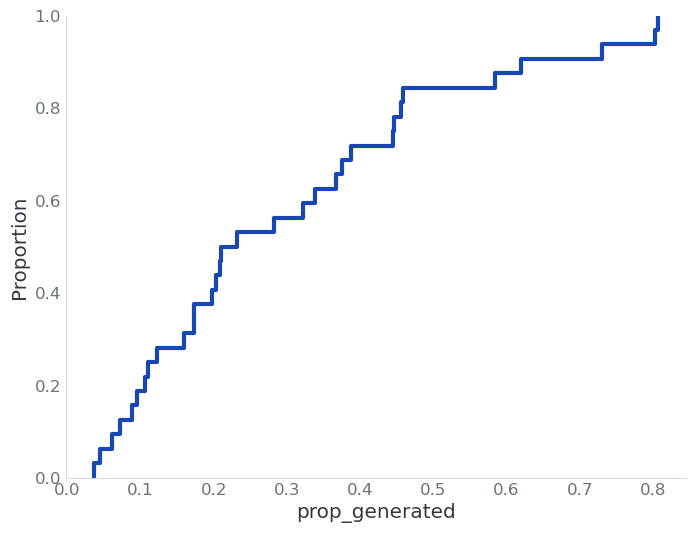

In [7]:
import numpy as np


sns.ecdfplot(df, x='prop_generated')

In [12]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import hvplot.pandas

df.hvplot.scatter(
    x='best_gen_e_form', y='true_e_form', hover_cols=['formula_pretty', 'index', 'category', 'nsites'],
    aspect=1, by='matches')

:NdOverlay   [matches]
   :Scatter   [best_gen_e_form]   (true_e_form,formula_pretty,index,category,nsites)

In [14]:
df.loc[[28]]

,sg_symbol,symm,conv,scale,wyckoffs,prop_generated,avg_num_successful,prop_actual_success,best_struct,best_relaxed,...,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct,matches,best_e_form
28,Im-3,"[[0. 0. 0.] La, [ 1.8600665 -1.8637325 -1.8631...","[[0. 0. 0.] La, [3.72461283 3.72461283 3.72461...",2.0,1a_4c_3b_12g,0.106762,0.718861,1.0,"[[0. 3.52488041 3.52488041] Cu, [3.524...",[[1.16242215e-07 3.77422160e+00 3.77422132e+00...,...,20,204,4,Cr Cu La O,Cubic,template-based_quartenary,1,"[[0. 0. 0.] La, [ 1.8600665 -1.8637325 -1.8631...",0,-13.855931


In [19]:
quick_view(df.loc[10, 'best_struct'])

In [20]:
quick_view(df.loc[10, 'conv'])

In [148]:
df.head()

,sg_symbol,symm,conv,scale,wyckoffs,prop_generated,avg_num_successful,prop_actual_success,best_struct,best_relaxed,...,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct,matches,best_e_form
0,Pm-3m,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....","[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....",1.0,1b_1a,0.714286,0.714286,1.0,"[[0. 0. 0.] Ga, [1.38645637 1.38645637 1.38645...",[[-8.64066621e-10 -2.59219987e-09 -1.44011106e...,...,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....",1,-0.335494
1,Pm-3m,"[[1.62043406 1.62043406 1.62043406] Sc, [0. 0....","[[1.62043406 1.62043406 1.62043407] Sc, [0. 0....",1.0,1b_1a,0.769231,0.769231,1.0,"[[0. 0. 0.] Sc, [1.54828346 1.54828346 1.54828...",[[-1.63124838e-09 -6.52499343e-10 -3.26249673e...,...,2,221,2,Cu Sc,Cubic,binary_easy,0,"[[1.62043406 1.62043406 1.62043406] Sc, [0. 0....",1,-0.343769
2,Pm-3m,"[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]","[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]",1.0,1b_1a,0.909091,0.909091,1.0,"[[1.66624594 1.66624594 1.66624594] Y, [0. 0. ...","[[1.72011021 1.72011019 1.72011019] Y, [-6.880...",...,2,221,2,Ir Y,Cubic,binary_easy,0,"[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]",1,-0.528427
3,F-43m,"[[0. 0. 0.] Li, [-4.4150055 -4.4150055 -4.4150...","[[0. 0. 0.] Li, [-1.80227412e-16 2.94333700e+...",4.0,1a_1c_1b,0.421687,0.680723,1.0,"[[0. 0. 0.] Li, [0. 2.34920311 2.34920...",[[-8.57000000e-18 -1.76401546e-09 -5.88005165e...,...,3,216,3,Ga Li Si,Cubic,ternary_easy,0,"[[0. 0. 0.] Li, [-4.4150055 -4.4150055 -4.4150...",0,-0.153237
4,Fm-3m,"[[3.339564 3.339564 3.339564] Li, [5.009346 5....",[[3.33956400e+00 0.00000000e+00 2.04489318e-16...,4.0,1b_2c_1a,0.431034,0.574713,1.0,"[[2.48980379 2.48980379 2.48980379] Li, [0. ...","[[3.35011374 3.35011378 3.35011393] Li, [ 1.20...",...,4,225,3,Ga Li Mg,Cubic,ternary_easy,0,"[[3.339564 3.339564 3.339564] Li, [5.009346 5....",1,-0.069983


In [152]:
df.groupby('sg_symbol').mean(numeric_only=True).hvplot.bar(x='sg_symbol', y='matches')

:Bars   [sg_symbol]   (matches)

In [161]:
df.loc[25, 'material_id']

'mp-476'

In [153]:
df.query('sg_symbol == "Fd-3m"')

,sg_symbol,symm,conv,scale,wyckoffs,prop_generated,avg_num_successful,prop_actual_success,best_struct,best_relaxed,...,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct,matches,best_e_form
25,Fd-3m,"[[1.038956 1.038956 1.038956] Ge, [1.038956 3....","[[1.038956 5.19478 1.038956] Ge, [1.038956 7....",4.0,4d_2a_8e,0.407407,3.851852,1.0,"[[2.42357415 0. 1.6157161 ] Ge, [0.807...",[[3.31828516e+00 1.14754432e-06 2.21219077e+00...,...,14,227,2,Ge N,Cubic,polymorph_binary,6,"[[1.038956 1.038956 1.038956] Ge, [1.038956 3....",0,-0.109428


In [18]:
from baysic.pyro_generator import SystemStructureModel
from baysic.lattice import CubicLattice

mod = SystemStructureModel(df.loc[25, 'conv'].composition, CubicLattice)
mod.wyck_opt

tensor(68402)

In [162]:
df.loc[25, 'symm'].wyckoff_symbols

['4d', '2a', '8e']

In [170]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

sga = SpacegroupAnalyzer(df.loc[25, 'best_relaxed'])
symm = sga.get_symmetrized_structure()
print(sga.get_symmetry_dataset()['international'])
print(symm.wyckoff_symbols)

Ia-3d
['24d', '32e']


In [163]:
mod.wyckoff_options.index([['16d', '8a'], ['32e']])

69270

In [166]:
print(mod.count_cards[69270],
    mod.opt_cards[69270],
    mod.group_cards[69270])

tensor(0.0029) tensor(1.0939e-05) tensor(0.0071)
